# Question1 - Titanic Dataset

**1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class.**

In [87]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [88]:
df=pd.read_csv("train.csv")

In [ ]:
df.head()

In [90]:
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex'])

-0.5433513806577553

**a. Do you think we should keep this feature?**

A negative (inverse) correlation occurs when the correlation coefficient is less than 0. This is an indication that both variables move in the opposite direction. In short, any reading between 0 and -1 means that the two securities move in opposite directions. If one variable increases, the other variable decreases with the same magnitude (and vice versa). However, the degree to which two securities are negatively correlated might vary over time (and they are almost never exactly correlated all the time). 
Removing a correlated feature does not make any difference in the outcome of the model. It is always better to remove the highly correlated features first and then least correlated ones.

**2. Do at least two visualizations to describe or show correlations.**

In [91]:
des=df.corr()
df.corr().style.background_gradient(cmap="Greens")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

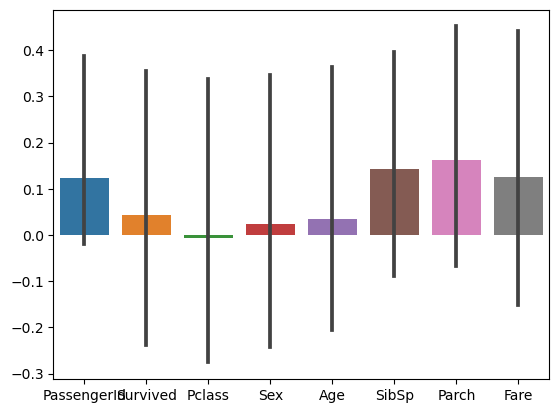

In [92]:
sns.barplot(data=des) #BarPlot Visualization for above dataset

<AxesSubplot:ylabel='Count'>

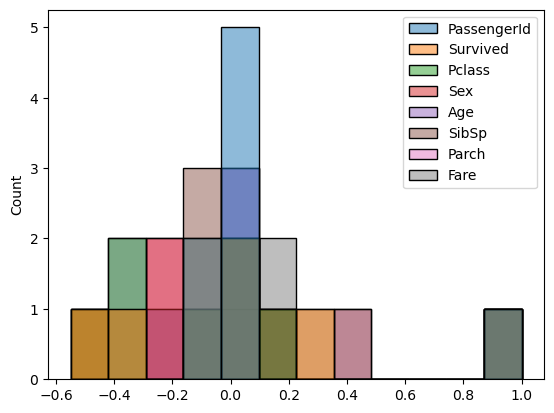

In [93]:
sns.histplot(data=des) #Histogram Visualization for above dataset

**3. Implement Naïve Bayes method using scikit-learn library and report the accuracy.**

In [94]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

# Join data to analyse and process the set as one.
train_raw['train'] = 1
test_raw['train'] = 0
df = train_raw.append(test_raw, sort=False)

features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')

In [95]:
# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values

train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)

In [96]:
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

In [97]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

%matplotlib inline
# Suppress warnings
warnings.filterwarnings("ignore")

In [98]:
classifier = GaussianNB()

classifier.fit(X_train, Y_train)

GaussianNB()

In [99]:
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80        85
         1.0       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143

[[68 17]
 [18 40]]
accuracy is 0.7552447552447552


# Question 2 - Glass Dataset 

**1. Implement Naïve Bayes method using scikit-learn library.**

**a. Use the glass dataset available in Link also provided in your assignment.**

In [100]:
glass=pd.read_csv("glass.csv") #importing glass dataset from given link

In [101]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [102]:
des=glass.corr()
glass.corr().style.background_gradient(cmap="Greens")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


**b. Use train_test_split to create training and testing part.**

In [103]:
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'


X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass[target],test_size=0.2, random_state=1)


**2. Evaluate the model on testing part using score and
classification_report(y_true, y_pred)**

In [104]:
classifier = GaussianNB()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('\naccuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]

accuracy is 0.8372093023255814


**1. Implement linear SVM method using scikit library**

We have already imported the glass dataset and also used train_test_split() method to split the dataset into train dataset and test dataset while implementing Naïve Bayes method.

In [105]:
from sklearn.svm import SVC, LinearSVC
classifier = LinearSVC()

classifier.fit(X_train, Y_train)

LinearSVC()

**2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)**

In [106]:
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('\naccuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.05      1.00      0.10         1
           7       0.00      0.00      0.00         4

    accuracy                           0.44        43
   macro avg       0.18      0.32      0.18        43
weighted avg       0.44      0.44      0.43        43

[[18  0  0  0  1  0]
 [ 0  0  0  1 11  0]
 [ 0  0  0  3  3  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  3  0]]

accuracy is 0.4418604651162791


**Do at least two visualizations to describe or show correlations in the Glass Dataset.**

<AxesSubplot:>

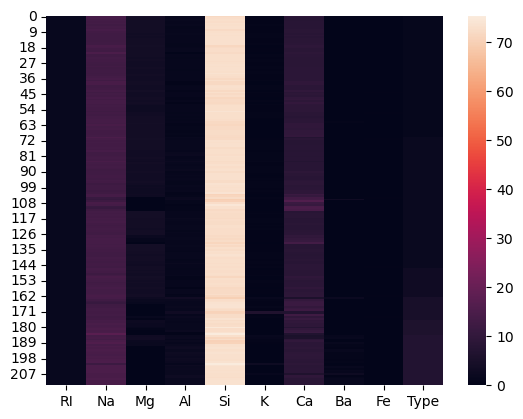

In [107]:
sns.heatmap(data=glass) #HeatMap Visualization for above dataset

<AxesSubplot:>

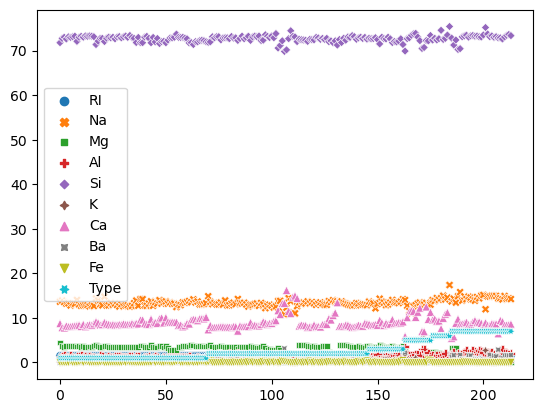

In [108]:
sns.scatterplot(data=glass)  #ScatterPlot Visualization for above dataset

**Which algorithm you got better accuracy? Can you justify why?**

According to the above accuracy scores Naive Bayes method is best for data visualization than that of Support Vector Machine method.
The performance of the each algorithm depends on several factors. So, few algorithms works well for only few of the problems and does not work well for other problems. By evaluating the model using various algorithms we can compare and then state which one is best.